# Importing dataset and libs

In [1]:
!wget -O iris.csv 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

--2022-09-01 01:00:34--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-09-01 01:00:34 (43.0 MB/s) - ‘iris.csv’ saved [3858/3858]



In [2]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=58319e7e565d06ddfc6d17c5a238bbd2fec97748c2b5ff2759731ccf73cd3dd5
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [3]:
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from minisom import MiniSom
import time

# EDA

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 1440x1440 with 0 Axes>

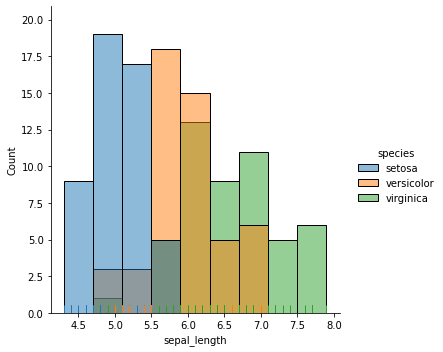

In [5]:
plt.figure(figsize=(20,20))
sns.displot(data=df, x='sepal_length', hue='species', kind="hist", rug=True)
plt.show()

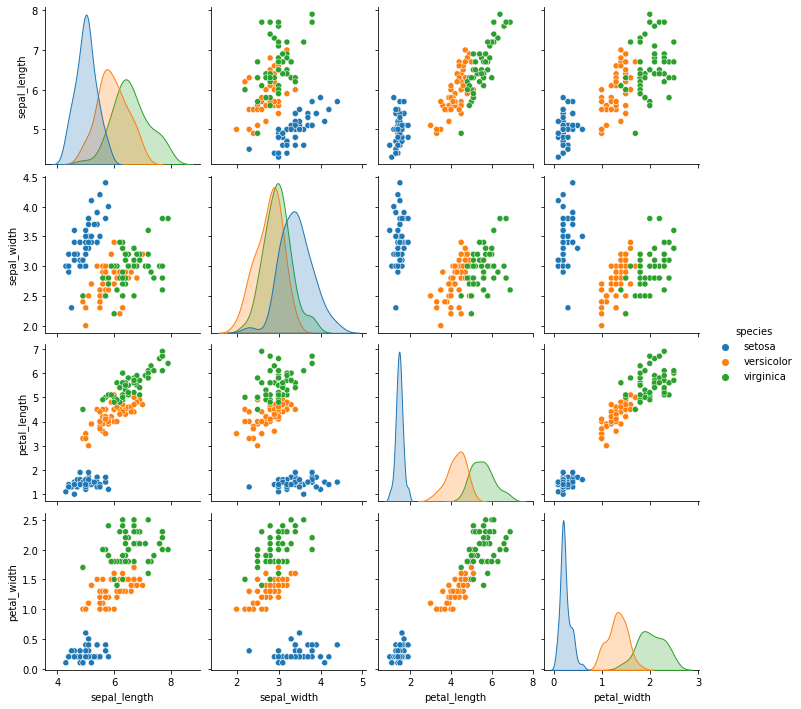

In [6]:
sns.pairplot(df, hue='species')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data preprocessing

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df_X = df.drop(labels=['species'], axis='columns')
df_y = df['species']
df_X 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(df_X)

new_columns = ['scal_sepal_length','scal_sepal_width','scal_petal_length','scal_petal_width']
new_df_X = pd.DataFrame(data=X_transformed, columns=new_columns)
new_df_X

,scal_sepal_length,scal_sepal_width,scal_petal_length,scal_petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_y = le.fit_transform(df_y)
new_df_y = pd.DataFrame(data=encoded_y, columns=['species'])
new_df_y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [13]:
le.inverse_transform([0, 1, 2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Train/test split

In [14]:
rseed = 21

In [15]:
aux = new_df_X.copy()
aux['species'] = new_df_y
aux = aux.sample(frac=1, random_state=rseed).reset_index(drop=True)

new_df_y = aux['species']
new_df_X = aux.drop(axis=1, columns=['species'])

len(new_df_X), len(new_df_y)

(150, 150)

# Creating the model

## Self Organizing Maps

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df_X, new_df_y)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [17]:
%matplotlib inline

In [18]:
def create_SOM(x, y, input_len, sigma, learning_rate):
  new_df_X_array = np.array(new_df_X)
  return MiniSom(
    x = x,
    y = y,
    input_len = input_len,
    sigma = sigma,
    learning_rate = learning_rate)

def train_SOM(som, X, iterations):
  som.random_weights_init(X)
  som.train_random(X, iterations)
  return

def print_distances_wns_labels(som, X, y):
  plt.figure(figsize=(12,10))
  plt.pcolor(som.distance_map(), cmap='bone_r')
  plt.colorbar()

  markers = ['o','s','D']
  colors = ['r', 'g', 'b']
  for i,curr_x in enumerate(X):
    w = som.winner(curr_x)
    plt.plot(
        w[0]+0.5,
        w[1]+0.5,
        marker=markers[y[i]],
        markerfacecolor='None',
        markeredgecolor=colors[y[i]],
        markersize=12,
        markeredgewidth=2)
  plt.title("SOM")
  plt.axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
  plt.show()
  return

In [19]:
def create_label_map(som, x_dim, y_dim, X, y):
  _x, _y = x_dim, y_dim
  
  # criar a matriz de listas
  map = np.empty((_x, _y), dtype=object)
  for r in range(_x):
    for c in range(_y):
      map[r][c] = []
      
  # preencher as listas com as labels de cada neuronio    
  for i,curr_x in enumerate(X):
    w = som.winner(curr_x)
    map[w[0]][w[1]].append(y[i])

  # criar a matriz de labels
  label_map = np.empty((_x, _y), dtype=np.int32)

  # escolher a label vencedora de cada neuronio
  for r in range(map.shape[0]):
    for c in range(map.shape[1]):
      if map[r][c] == []:
        label_map[r][c] = -1
        continue

      freq_dict = {}
      for elem in map[r][c]:
        if not elem in freq_dict:
          freq_dict[elem] = 1
        else:
          freq_dict[elem] += 1

      sorted_list = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
      label_map[r][c] = np.int32(int(sorted_list[0][0]))
  return label_map

def print_label_map(label_map):
  plt.figure(figsize=(12,10))
  plt.pcolor(som.distance_map(), cmap='bone_r')

  markers = ['o','s','D']
  colors = ['r', 'g', 'b']
  for r in range(label_map.shape[0]):
    for c in range(label_map.shape[1]):
      if label_map[r][c] == -1:
        continue
      plt.plot(r+0.5, c+0.5, marker=markers[label_map[r][c]], markerfacecolor='None',markeredgecolor=colors[label_map[r][c]], markersize=12, markeredgewidth=2)

  plt.colorbar()
  plt.show()
  return


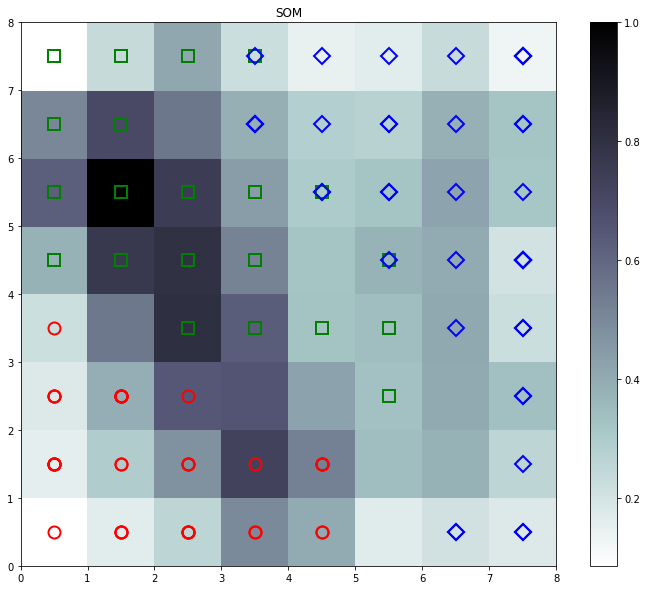

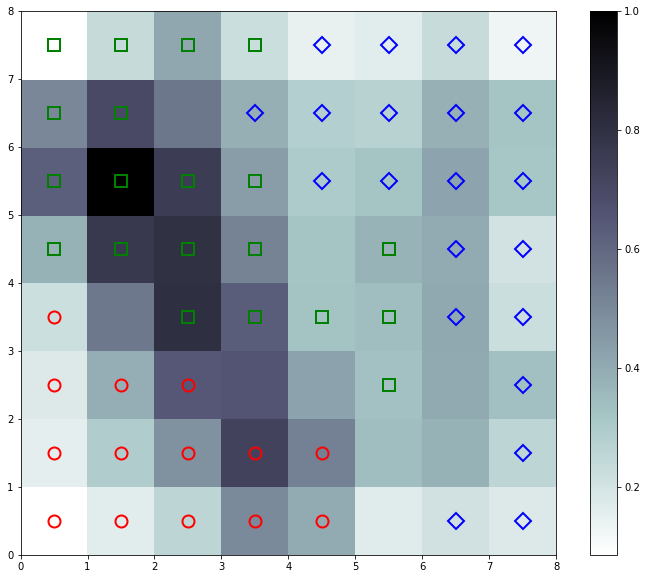

In [20]:
x = 8
y = 8
input_len = X_train.shape[1]
sigma = 1.5
learning_rate = 0.5

iterations = 3000

som = create_SOM(x=x, y=y, input_len=input_len, sigma=sigma, learning_rate=learning_rate)
train_SOM(som=som, X=X_train, iterations=iterations)
print_distances_wns_labels(som=som, X=X_train, y=y_train)
label_map = create_label_map(som=som, x_dim=x, y_dim=y, X=X_train, y=y_train)
print_label_map(label_map)

### Testando funções de plot

In [ ]:
som.distance_map()

array([[0.20877924, 0.40542938, 0.59806498, 0.33166834, 0.30892622,
        0.26631584, 0.35308525, 0.21637872],
       [0.34595366, 0.61650463, 0.60105914, 0.63881898, 0.4907136 ,
        0.46689436, 0.68320583, 0.47883145],
       [0.27965484, 0.5341045 , 0.50824051, 0.48929295, 0.48319179,
        0.54117006, 0.72384062, 0.6140825 ],
       [0.26486923, 0.43425268, 0.44189275, 0.45340649, 0.44164188,
        0.44590055, 0.63657892, 0.40149394],
       [0.43986107, 0.74968021, 0.92435621, 0.7097393 , 0.62115208,
        0.49017351, 0.46459841, 0.28011249],
       [0.65519349, 1.        , 0.81448288, 0.80756521, 0.8110578 ,
        0.88237972, 0.9580534 , 0.58112786],
       [0.46775544, 0.55706813, 0.40241874, 0.40083904, 0.56610935,
        0.81254133, 0.96715713, 0.70750784],
       [0.14581766, 0.24081322, 0.23159135, 0.20117394, 0.22871094,
        0.25917976, 0.34222098, 0.34532543]])

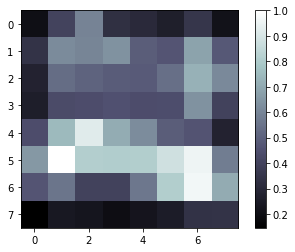

In [ ]:
plt.imshow(som.distance_map())
colorbar()
plt.show()

In [ ]:
for row in range(som.distance_map().shape[0]):
  print(som.distance_map()[row])

[0.20877924 0.40542938 0.59806498 0.33166834 0.30892622 0.26631584
 0.35308525 0.21637872]
[0.34595366 0.61650463 0.60105914 0.63881898 0.4907136  0.46689436
 0.68320583 0.47883145]
[0.27965484 0.5341045  0.50824051 0.48929295 0.48319179 0.54117006
 0.72384062 0.6140825 ]
[0.26486923 0.43425268 0.44189275 0.45340649 0.44164188 0.44590055
 0.63657892 0.40149394]
[0.43986107 0.74968021 0.92435621 0.7097393  0.62115208 0.49017351
 0.46459841 0.28011249]
[0.65519349 1.         0.81448288 0.80756521 0.8110578  0.88237972
 0.9580534  0.58112786]
[0.46775544 0.55706813 0.40241874 0.40083904 0.56610935 0.81254133
 0.96715713 0.70750784]
[0.14581766 0.24081322 0.23159135 0.20117394 0.22871094 0.25917976
 0.34222098 0.34532543]


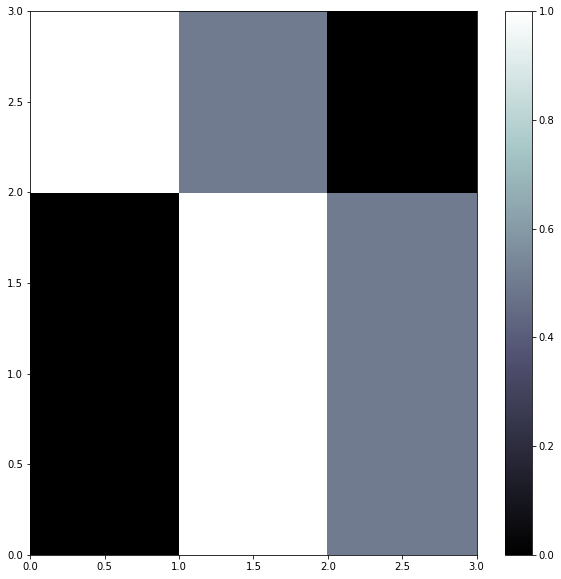

In [ ]:
teste = [
    [0, 1, 0.5],
    [0, 1, 0.5],
    [1, 0.5, 0],
]

teste = np.array(teste)

plt.figure(figsize=(10, 10))
bone()
pcolor(teste)
colorbar()
show()

In [ ]:
teste, teste.T

(array([[0.  , 1.  ],
        [0.5 , 0.25]]), array([[0.  , 0.5 ],
        [1.  , 0.25]]))

### Continuação do modelo

In [21]:
def som_predict(som, x_data):
  preds = np.empty(x_data.shape[0], dtype=np.int32)
  for r in range(x_data.shape[0]):
    w = som.winner(x_data[r])
    preds[r] = label_map[w[0]][w[1]]
  return preds

In [22]:
def print_predicts(som, x_data):
  preds = np.empty(x_data.shape[0], dtype=np.int32)
  for r in range(x_data.shape[0]):
    w = som.winner(x_data[r])
    preds[r] = label_map[w[0]][w[1]]
  return

In [23]:
preds = som_predict(som, X_test)
preds

array([ 0, -1,  1,  1,  2,  0,  1,  0,  1,  1,  1,  2,  1,  1,  1,  2,  2,
        1,  0,  0,  0,  1,  0,  1,  0,  2,  0,  0,  1,  0,  1,  1,  1,  1,
        1,  0,  2,  2], dtype=int32)

In [24]:
from sklearn.metrics import classification_report


print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      1.00      1.00        12
           1       0.78      1.00      0.88        14
           2       1.00      0.58      0.74        12

    accuracy                           0.87        38
   macro avg       0.69      0.65      0.65        38
weighted avg       0.92      0.87      0.87        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Clustering: Kmeans

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
preds = model.fit_predict(X=new_df_X)

In [ ]:
aux['preds'] = preds
aux

,scal_sepal_length,scal_sepal_width,scal_petal_length,scal_petal_width,species,preds
0,-0.052506,2.189072,-1.455004,-1.312977,0,1
1,-1.506521,0.800654,-1.341272,-1.181504,0,1
2,-0.900681,1.032057,-1.341272,-1.181504,0,1
3,-0.173674,1.726266,-1.170675,-1.181504,0,1
4,1.280340,0.106445,0.933356,1.185010,2,0
...,...,...,...,...,...,...
145,-0.052506,-0.819166,0.080370,0.001753,1,2
146,-0.658345,1.494863,-1.284407,-1.312977,0,1
147,-0.900681,0.800654,-1.284407,-1.312977,0,1
148,0.310998,-1.050569,1.047087,0.264699,2,2


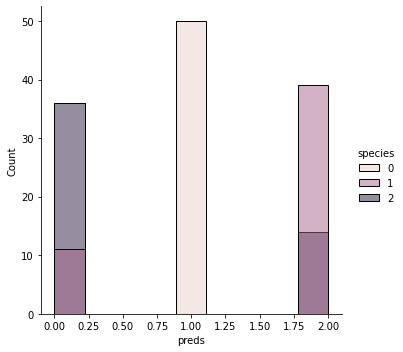

In [ ]:
sns.displot(data=aux,x='preds', hue='species')

(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

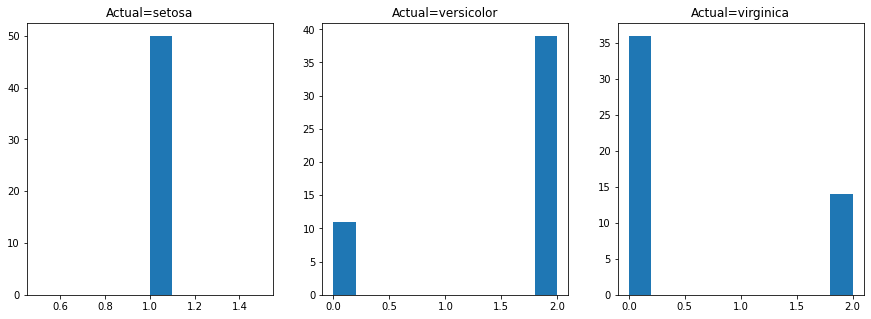

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3, 1)
plt.title('Actual=setosa')
plt.hist(x=aux.loc[aux['species'] == le.transform(['setosa'])[0]]['preds'])

plt.subplot(1,3, 2)
plt.title('Actual=versicolor')
plt.hist(x=aux.loc[aux['species'] == le.transform(['versicolor'])[0]]['preds'])

plt.subplot(1,3, 3)
plt.title('Actual=virginica')
plt.hist(x=aux.loc[aux['species'] == le.transform(['virginica'])[0]]['preds'])

## Logistic Regression

In [ ]:
new_df_y

0      0
1      0
2      0
3      0
4      2
      ..
145    1
146    0
147    0
148    2
149    1
Name: species, Length: 150, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

lr_model = LogisticRegression()
kf = KFold(n_splits=5)
score_list=[]
for train_indexes, test_indexes in kf.split(new_df_X):
  kf_X_train = new_df_X.to_numpy()[train_indexes]
  kf_X_test = new_df_X.to_numpy()[test_indexes]

  kf_y_train = new_df_y.to_numpy()[train_indexes]
  kf_y_test = new_df_y.to_numpy()[test_indexes]
  
  lr_model.fit(kf_X_train, kf_y_train)
  score_list.append(lr_model.score(kf_X_test, kf_y_test))

score_list, "mean = "  + str(round(sum(score_list)/len(score_list), 3))

([0.9333333333333333,
  1.0,
  0.9666666666666667,
  0.9666666666666667,
  0.9333333333333333],
 'mean = 0.96')